# ***Human Activity Recognition with Smartphone ***

**Description:** 
The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities performed.

- The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities


1.   WALKING
2.   WALKING UPSTAIRS
3.   WALKING DOWNSTAIRS
4.   SITTING
5.   STANDING
6.   LAYING
<br>wearing a smartphone (Samsung Galaxy S II) on the waist.

<br> **Two embeded sensors from smartphone are used**
1. accelerometer - Captures 3-axial (XYZ) linear acceleration at a constant rate of 50Hz.
2. gyroscope - Captures 3-axial (XYZ) angular velocity at a constant rate of 50Hz.

**Data Collection:**
<br>1. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.
<br> 2. The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window)

<br> 3. Two sensors (Gyroscope and accelerometer) in a smartphone are used to record,
 1. '3-axial linear acceleration'(tAcc-XYZ) from accelerometer 
 2. '3-axial angular velocity' (tGyro-XYZ) from Gyroscope with several variations.

**Attribute information**
1. For each record in the dataset the following is provided:
2. Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.
3. Triaxial Angular velocity from the gyroscope.
4. A 561-feature vector with time and frequency domain variables.
5. Its activity label.
6. An identifier of the subject who carried out the experiment.

**Relevant papers** 
1. Davide Anguita, Alessandro Ghio, Luca Oneto, Xavier Parra and Jorge L. Reyes-Ortiz. Human Activity Recognition on Smartphones using a Multiclass Hardware-Friendly Support Vector Machine. International Workshop of Ambient Assisted Living (IWAAL 2012). Vitoria-Gasteiz, Spain. Dec 2012

2. Davide Anguita, Alessandro Ghio, Luca Oneto, Xavier Parra, Jorge L. Reyes-Ortiz. Energy Efficient Smartphone-Based Activity Recognition using Fixed-Point Arithmetic. Journal of Universal Computer Science. Special Issue in Ambient Assisted Living: Home Care. Volume 19, Issue 9. May 2013

3. Davide Anguita, Alessandro Ghio, Luca Oneto, Xavier Parra and Jorge L. Reyes-Ortiz. Human Activity Recognition on Smartphones using a Multiclass Hardware-Friendly Support Vector Machine. 4th International Workshop of Ambient Assited Living, IWAAL 2012, Vitoria-Gasteiz, Spain, December 3-5, 2012. Proceedings. Lecture Notes in Computer Science 2012, pp 216-223.

4. Jorge Luis Reyes-Ortiz, Alessandro Ghio, Xavier Parra-Llanas, Davide Anguita, Joan Cabestany, Andreu Català. Human Activity and Motion Disorder Recognition: Towards Smarter Interactive Cognitive Environments. 21st European Symposium on Artificial Neural Networks, Computational Intelligence and Machine Learning, ESANN 2013. Bruges, Belgium 24-26 April 2013.

## Important Links
1. RAPIDS installation guide: https://rapids.ai/start.html
2. cuDF APIs documentation: https://docs.rapids.ai/api/cudf/stable/api.html#dataframe
3. cuML APIs documentation: https://docs.rapids.ai/api/cuml/stable/api.html#
4. Human Activity Recognition data acquisition: https://www.youtube.com/watch?time_continue=68&v=XOEN9W05_4A&feature=emb_logo

In [1]:
!nvidia-smi

Tue Jul 21 17:00:19 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.59       Driver Version: 440.59       CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Quadro GV100        On   | 00000000:65:00.0 Off |                  Off |
| 32%   44C    P2    26W / 250W |   1174MiB / 32505MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import cudf as gdf # Here we import cudf instead of Pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm

In [3]:
gpuTrain = gdf.read_csv('train.csv')
gpuTest = gdf.read_csv('test.csv')

In [4]:
gpu_df = gdf.concat([gpuTrain,gpuTest])
gpu_df.reset_index(inplace=True)
gpu_df.drop('index',inplace=True,axis = 1)

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0               0.288585          -0.020294          -0.132905   
1               0.278419          -0.016411          -0.123520   
2               0.279653          -0.019467          -0.113462   
3               0.279174          -0.026201          -0.123283   
4               0.276629          -0.016570          -0.115362   
...                  ...                ...                ...   
10294           0.310155          -0.053391          -0.099109   
10295           0.363385          -0.039214          -0.105915   
10296           0.349966           0.030077          -0.115788   
10297           0.237594           0.018467          -0.096499   
10298           0.153627          -0.018437          -0.137018   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0             -0.995279         -0.983111         -0.913526         -0.995112   
1             -0.998245         -0.975300         -0.960322         -0.998807   
2             -0.995380         -0.967187         -0.978944         -0.996520   
3             -0.996091         -0.983403         -0.990675         -0.997099   
4             -0.998139         -0.980817         -0.990482         -0.998321   
...                 ...               ...               ...               ...   
10294         -0.287866         -0.140589         -0.215088         -0.356083   
10295         -0.305388          0.028148         -0.196373         -0.373540   
10296         -0.329638         -0.042143         -0.250181         -0.388017   
10297         -0.323114         -0.229775         -0.207574         -0.392380   
10298         -0.330046         -0.195253         -0.164339         -0.430974   

       tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
0             -0.983185         -0.923527         -0.934724  ...   
1             -0.974914         -0.957686         -0.943068  ...   
2             -0.963668         -0.977469         -0.938692  ...   
3             -0.982750         -0.989302         -0.938692  ...   
4             -0.979672         -0.990441         -0.942469  ...   
...                 ...               ...               ...  ...   
10294         -0.148775         -0.232057          0.185361  ...   
10295         -0.030036         -0.270237          0.185361  ...   
10296         -0.133257         -0.347029          0.007471  ...   
10297         -0.279610         -0.289477          0.007471  ...   
10298         -0.218295         -0.229933         -0.111527  ...   

       fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
0                            -0.710304                    -0.112754   
1                            -0.861499                     0.053477   
2                            -0.760104                    -0.118559   
3                            -0.482845                    -0.036788   
4                            -0.699205                     0.123320   
...                                ...                          ...   
10294                        -0.750809                    -0.337422   
10295                        -0.700274                    -0.736701   
10296                        -0.467179                    -0.181560   
10297                        -0.617737                     0.444558   
10298                        -0.436940                     0.598808   

       angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                                  0.030400                         -0.464761   
1                                 -0.007435                         -0.732626   
2                                  0.177899                          0.100699   
3                                 -0.012892                          0.640011   
4                                  0.122542                          0.693578   
...                                     ...                               ...   
1029

#### Note:
Here we are creating two seperate dataframes one on cpu side cpu_df and other on GPU side gpu_df
- Why?
 Because some analysis we will perform on CPU side like plotting and the computationally intensive tasks like training, Hyperpaprameter tuning cross validation testing will be preformed on GPU (Only because dataset is smaller, if dataset is very large then one can perform all processing on GPU)
 - As GPU and CPU have seperate memory space hence it is better to keep both dataframes seperately
 - Sometimes it is necessary to copy results back from GPU to CPU to perform futher analysis
 - Transfer between CPU to GPU is not much costlier (it is faster)

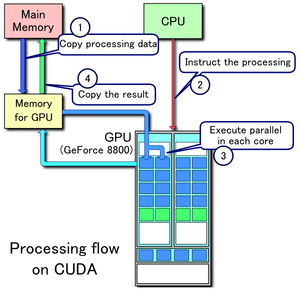

In [5]:
cpu_df = gpu_df.to_pandas()

In [6]:
type(cpu_df)

pandas.core.frame.DataFrame

In [7]:
type(gpu_df)

cudf.core.dataframe.DataFrame

In [8]:
#df.info() - This works with pandas but not with cudf

In [9]:
print("Number of Data Points: ", gpu_df.shape[0])
print("Number of Fatures    : ", gpu_df.shape[1])

Number of Data Points:  10299
Number of Fatures    :  563


In [10]:
print("Number of Data Points: ", cpu_df.shape[0])
print("Number of Fatures    : ", cpu_df.shape[1])

Number of Data Points:  10299
Number of Fatures    :  563


In [11]:
print(gpu_df.columns)

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)


#### Note:
As column names contains some special characters like (, ), -  lets remove them first

In [12]:
columnNames = list()
columnNames = gpu_df.columns
columnNames

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [13]:
badChars = ['-', '()','(',')', ',']

In [14]:
newColumnNames = []
for colName in columnNames:
  newColumnName = ''.join(i for i in colName if i not in badChars)
  newColumnNames.append(newColumnName)

In [15]:
newColumnNames

['tBodyAccmeanX',
 'tBodyAccmeanY',
 'tBodyAccmeanZ',
 'tBodyAccstdX',
 'tBodyAccstdY',
 'tBodyAccstdZ',
 'tBodyAccmadX',
 'tBodyAccmadY',
 'tBodyAccmadZ',
 'tBodyAccmaxX',
 'tBodyAccmaxY',
 'tBodyAccmaxZ',
 'tBodyAccminX',
 'tBodyAccminY',
 'tBodyAccminZ',
 'tBodyAccsma',
 'tBodyAccenergyX',
 'tBodyAccenergyY',
 'tBodyAccenergyZ',
 'tBodyAcciqrX',
 'tBodyAcciqrY',
 'tBodyAcciqrZ',
 'tBodyAccentropyX',
 'tBodyAccentropyY',
 'tBodyAccentropyZ',
 'tBodyAccarCoeffX1',
 'tBodyAccarCoeffX2',
 'tBodyAccarCoeffX3',
 'tBodyAccarCoeffX4',
 'tBodyAccarCoeffY1',
 'tBodyAccarCoeffY2',
 'tBodyAccarCoeffY3',
 'tBodyAccarCoeffY4',
 'tBodyAccarCoeffZ1',
 'tBodyAccarCoeffZ2',
 'tBodyAccarCoeffZ3',
 'tBodyAccarCoeffZ4',
 'tBodyAcccorrelationXY',
 'tBodyAcccorrelationXZ',
 'tBodyAcccorrelationYZ',
 'tGravityAccmeanX',
 'tGravityAccmeanY',
 'tGravityAccmeanZ',
 'tGravityAccstdX',
 'tGravityAccstdY',
 'tGravityAccstdZ',
 'tGravityAccmadX',
 'tGravityAccmadY',
 'tGravityAccmadZ',
 'tGravityAccmaxX',
 'tGrav

In [16]:
gpu_df.columns = newColumnNames

In [17]:
cpu_df.columns = newColumnNames

In [18]:
gpu_df.head()

tBodyAccmeanX  tBodyAccmeanY  tBodyAccmeanZ  tBodyAccstdX  tBodyAccstdY  \
0       0.288585      -0.020294      -0.132905     -0.995279     -0.983111   
1       0.278419      -0.016411      -0.123520     -0.998245     -0.975300   
2       0.279653      -0.019467      -0.113462     -0.995380     -0.967187   
3       0.279174      -0.026201      -0.123283     -0.996091     -0.983403   
4       0.276629      -0.016570      -0.115362     -0.998139     -0.980817   

   tBodyAccstdZ  tBodyAccmadX  tBodyAccmadY  tBodyAccmadZ  tBodyAccmaxX  ...  \
0     -0.913526     -0.995112     -0.983185     -0.923527     -0.934724  ...   
1     -0.960322     -0.998807     -0.974914     -0.957686     -0.943068  ...   
2     -0.978944     -0.996520     -0.963668     -0.977469     -0.938692  ...   
3     -0.990675     -0.997099     -0.982750     -0.989302     -0.938692  ...   
4     -0.990482     -0.998321     -0.979672     -0.990441     -0.942469  ...   

   fBodyBodyGyroJerkMagkurtosis  angletBodyAccMeangravity  \
0                     -0.710304                 -0.112754   
1                     -0.861499                  0.053477   
2                     -0.760104                 -0.118559   
3                     -0.482845                 -0.036788   
4                     -0.699205                  0.123320   

   angletBodyAccJerkMeangravityMean  angletBodyGyroMeangravityMean  \
0                          0.030400                      -0.464761   
1                         -0.007435                      -0.732626   
2                          0.177899                       0.100699   
3                         -0.012892                       0.640011   
4                          0.122542                       0.693578   

   angletBodyGyroJerkMeangravityMean  angleXgravityMean  angleYgravityMean  \
0                          -0.018446          -0.841247           0.179941   
1                           0.703511          -0.844788           0.180289   
2                           0.808529          -0.848933           0.180637   
3                          -0.485366          -0.848649           0.181935   
4                          -0.615971          -0.847865           0.185151   

   angleZgravityMean  subject  Activity  
0          -0.058627        1  STANDING  
1          -0.054317        1  STANDING  
2          -0.049118        1  STANDING  
3          -0.047663        1  STANDING  
4          -0.043892        1  STANDING  

[5 rows x 563 columns]

In [19]:
cpu_df.head()

tBodyAccmeanX  tBodyAccmeanY  tBodyAccmeanZ  tBodyAccstdX  tBodyAccstdY  \
0       0.288585      -0.020294      -0.132905     -0.995279     -0.983111   
1       0.278419      -0.016411      -0.123520     -0.998245     -0.975300   
2       0.279653      -0.019467      -0.113462     -0.995380     -0.967187   
3       0.279174      -0.026201      -0.123283     -0.996091     -0.983403   
4       0.276629      -0.016570      -0.115362     -0.998139     -0.980817   

   tBodyAccstdZ  tBodyAccmadX  tBodyAccmadY  tBodyAccmadZ  tBodyAccmaxX  ...  \
0     -0.913526     -0.995112     -0.983185     -0.923527     -0.934724  ...   
1     -0.960322     -0.998807     -0.974914     -0.957686     -0.943068  ...   
2     -0.978944     -0.996520     -0.963668     -0.977469     -0.938692  ...   
3     -0.990675     -0.997099     -0.982750     -0.989302     -0.938692  ...   
4     -0.990482     -0.998321     -0.979672     -0.990441     -0.942469  ...   

   fBodyBodyGyroJerkMagkurtosis  angletBodyAccMeangravity  \
0                     -0.710304                 -0.112754   
1                     -0.861499                  0.053477   
2                     -0.760104                 -0.118559   
3                     -0.482845                 -0.036788   
4                     -0.699205                  0.123320   

   angletBodyAccJerkMeangravityMean  angletBodyGyroMeangravityMean  \
0                          0.030400                      -0.464761   
1                         -0.007435                      -0.732626   
2                          0.177899                       0.100699   
3                         -0.012892                       0.640011   
4                          0.122542                       0.693578   

   angletBodyGyroJerkMeangravityMean  angleXgravityMean  angleYgravityMean  \
0                          -0.018446          -0.841247           0.179941   
1                           0.703511          -0.844788           0.180289   
2                           0.808529          -0.848933           0.180637   
3                          -0.485366          -0.848649           0.181935   
4                          -0.615971          -0.847865           0.185151   

   angleZgravityMean  subject  Activity  
0          -0.058627        1  STANDING  
1          -0.054317        1  STANDING  
2          -0.049118        1  STANDING  
3          -0.047663        1  STANDING  
4          -0.043892        1  STANDING  

[5 rows x 563 columns]

### Note
1. X_*** contains all features
2. y_*** contains labels 

In [20]:
y_cpu = cpu_df['Activity'].copy() # copy() allocates seperate memory to y_cpu
X_cpu = cpu_df.drop('Activity',inplace = False, axis = 1)

In [21]:
y_gpu = gpu_df['Activity'].copy() # copy() allocates seperate memory to y_gpu
X_gpu = gpu_df.drop('Activity',inplace = False, axis = 1)

### Check if any missing value present in the dataframe

In [22]:
gpu_df.isnull().sum()

tBodyAccmeanX        0
tBodyAccmeanY        0
tBodyAccmeanZ        0
tBodyAccstdX         0
tBodyAccstdY         0
                    ..
angleXgravityMean    0
angleYgravityMean    0
angleZgravityMean    0
subject              0
Activity             0
Length: 563, dtype: int64

In [23]:
gpu_df.isnull().any().sum()

0

### Check if dataset is balanced or not

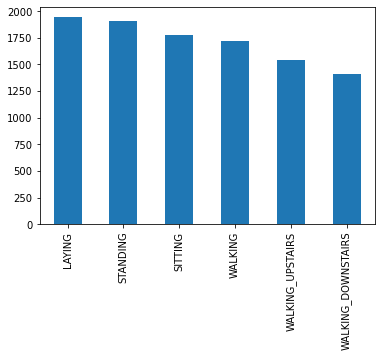

In [24]:
cpu_df.Activity.value_counts().plot.bar() 
# Here we are using cpu_df as cudf dont have plot function

### Observations
1. Dataset is almost balanced
2. Performance measure can be accuracy only...but to observe misclassifications we use Confusion, Precision and Recall matrices

# Exploratory Data Analysis

## Activities
1. Non Moving: SITTING, STANDING, LAYING
2. Moving    : WALKING, WALKING_DOWNSTAIRS, WALKING_UPSTAIRS

In [25]:
cpu_df.groupby('Activity').mean()

tBodyAccmeanX  tBodyAccmeanY  tBodyAccmeanZ  tBodyAccstdX  \
Activity                                                                        
LAYING                   0.268649      -0.018318      -0.107436     -0.960932   
SITTING                  0.273060      -0.012690      -0.105517     -0.983446   
STANDING                 0.279153      -0.016152      -0.106587     -0.984435   
WALKING                  0.276337      -0.017907      -0.108882     -0.314644   
WALKING_DOWNSTAIRS       0.288137      -0.016312      -0.105762      0.100766   
WALKING_UPSTAIRS         0.262295      -0.025923      -0.120538     -0.237990   

                    tBodyAccstdY  tBodyAccstdZ  tBodyAccmadX  tBodyAccmadY  \
Activity                                                                     
LAYING                 -0.943507     -0.948069     -0.963395     -0.944099   
SITTING                -0.934881     -0.938982     -0.985280     -0.934798   
STANDING               -0.932509     -0.939914     -0.987205     -0.933875   
WALKING                -0.023583     -0.273921     -0.352470     -0.055491   
WALKING_DOWNSTAIRS      0.059549     -0.190805      0.032426      0.003907   
WALKING_UPSTAIRS       -0.016033     -0.175450     -0.297094     -0.030865   

                    tBodyAccmadZ  tBodyAccmaxX  ...  \
Activity                                        ...   
LAYING                 -0.947261     -0.911610  ...   
SITTING                -0.936671     -0.926703  ...   
STANDING               -0.937739     -0.921265  ...   
WALKING                -0.274098     -0.113458  ...   
WALKING_DOWNSTAIRS     -0.214569      0.417152  ...   
WALKING_UPSTAIRS       -0.172811     -0.015003  ...   

                    fBodyBodyGyroJerkMagmeanFreq  \
Activity                                           
LAYING                                  0.165728   
SITTING                                 0.177739   
STANDING                                0.084865   
WALKING                                 0.130806   
WALKING_DOWNSTAIRS                      0.095759   
WALKING_UPSTAIRS                        0.094112   

                    fBodyBodyGyroJerkMagskewness  \
Activity                                           
LAYING                                 -0.342490   
SITTING                                -0.384740   
STANDING                               -0.343769   
WALKING                                -0.071308   
WALKING_DOWNSTAIRS                     -0.277020   
WALKING_UPSTAIRS                       -0.361533   

                    fBodyBodyGyroJerkMagkurtosis  angletBodyAccMeangravity  \
Activity                                                                     
LAYING                                 -0.658640                  0.010366   
SITTING                                -0.686795                  0.012034   
STANDING                               -0.654989                  0.006991   
WALKING                                -0.400268                  0.014918   
WALKING_DOWNSTAIRS                     -0.618394                 -0.039692   
WALKING_UPSTAIRS                       -0.682468                  0.035371   

                    angletBodyAccJerkMeangravityMean  \
Activity                                               
LAYING                                      0.016013   
SITTING                                     0.002458   
STANDING                                    0.010397   
WALKING                                    -0.007011   
WALKING_DOWNSTAIRS                         -0.018665   
WALKING_UPSTAIRS                            0.006652   

                    angletBodyGyroMeangravityMean  \
Activity                                            
LAYING                                   0.022788   
SITTING                                  0.013413   
STANDING                                 0.004614   
WALKING                                  0.011332   
WALKING_DOWNSTAIRS                       0.203588   
WALKING_UPSTAIRS          

In [26]:
gpu_df.groupby('Activity').mean()['tBodyAccmeanX']

Activity
LAYING                0.268649
SITTING               0.273060
STANDING              0.279153
WALKING               0.276337
WALKING_DOWNSTAIRS    0.288137
WALKING_UPSTAIRS      0.262295
Name: tBodyAccmeanX, dtype: float64

In [27]:
gpu_df.groupby('Activity').mean()['tBodyAccstdX']

Activity
LAYING               -0.960932
SITTING              -0.983446
STANDING             -0.984435
WALKING              -0.314644
WALKING_DOWNSTAIRS    0.100766
WALKING_UPSTAIRS     -0.237990
Name: tBodyAccstdX, dtype: float64

### Observations:
1. tBodyAccmeanX feature MAY not differentiate the activities
2. tBodyAccstdX feature MAY differentiate the moving and stationary activities as range of mean is different for these activities

#### Check if any duplicates are in the dataset

In [28]:
print("Number of duplicates: ", cpu_df.duplicated().sum()) # duplicated() function is not avilable in cudf hence we use cpu_df

Number of duplicates:  0


### Check if data is balanced with every subject (person)
### Note: plotting libraries like matplotlib and seaborn works on CPU data hence we need cpu_df

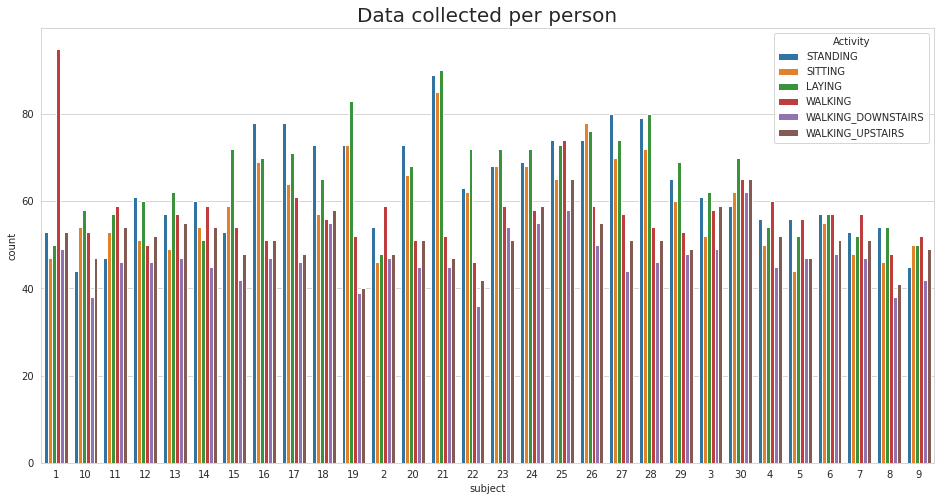

In [29]:
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'
plt.figure(figsize=(16,8))
plt.title('Data collected per person', fontsize=20)
sns.countplot(x='subject',hue='Activity', data = cpu_df)
plt.show()

### Observations:
1. Related to every subject data is almost balanced for all activities with few exceptions like subject 1 has more data related to WALKIN activity subject 19 and 21 have more data wrt stationary activity etc.

/opt/conda/envs/rapids/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.0, 5, 'Moving Activities')

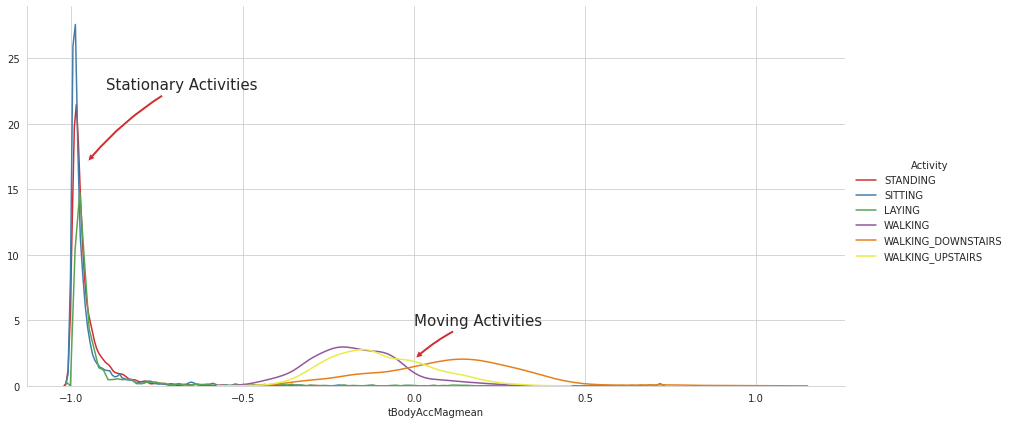

In [30]:
sns.set_palette("Set1", desat=0.8)
facetgrid = sns.FacetGrid(cpu_df,hue='Activity',size = 6, aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean',hist = False).add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=15,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.annotate("Moving Activities", xy = (0.0,2), xytext = (0.0,5),size = 15, va = 'center',ha='left', \
             arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

/opt/conda/envs/rapids/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.0, 5, 'Moving Activities')

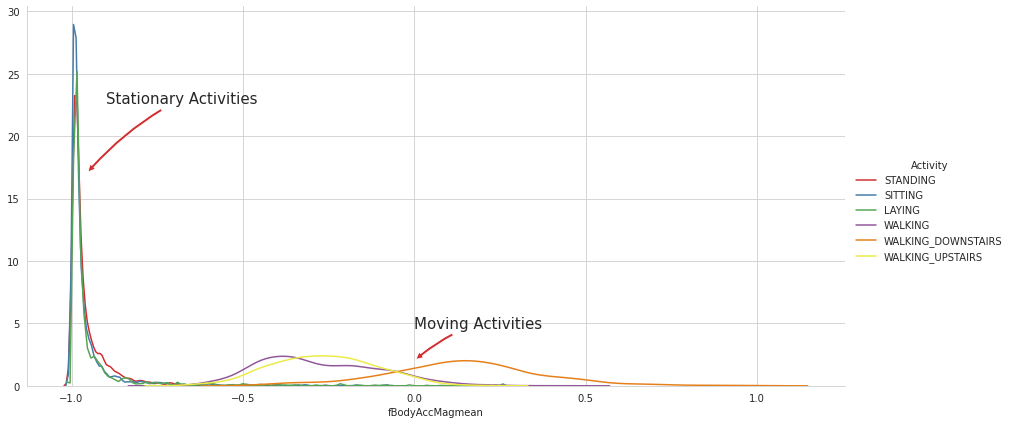

In [31]:
sns.set_palette("Set1", desat=0.8)
facetgrid = sns.FacetGrid(cpu_df,hue='Activity',size = 6, aspect=2)
facetgrid.map(sns.distplot,'fBodyAccMagmean',hist = False).add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=15,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.annotate("Moving Activities", xy = (0.0,2), xytext = (0.0,5),size = 15, va = 'center',ha='left', \
             arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

/opt/conda/envs/rapids/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.0, 5, 'Moving Activities')

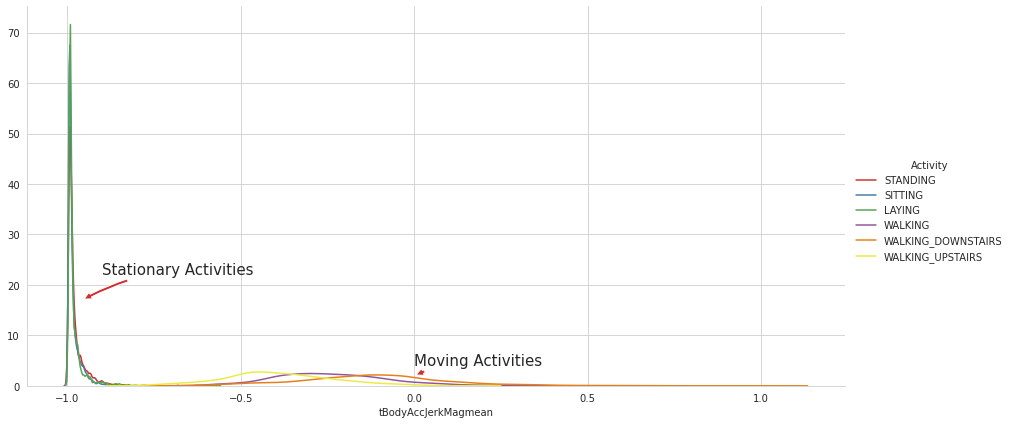

In [32]:
sns.set_palette("Set1", desat=0.8)
facetgrid = sns.FacetGrid(cpu_df,hue='Activity',size = 6, aspect=2)
facetgrid.map(sns.distplot,'tBodyAccJerkMagmean',hist = False).add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=15,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.annotate("Moving Activities", xy = (0.0,2), xytext = (0.0,5),size = 15, va = 'center',ha='left', \
             arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

/opt/conda/envs/rapids/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.0, 5, 'Moving Activities')

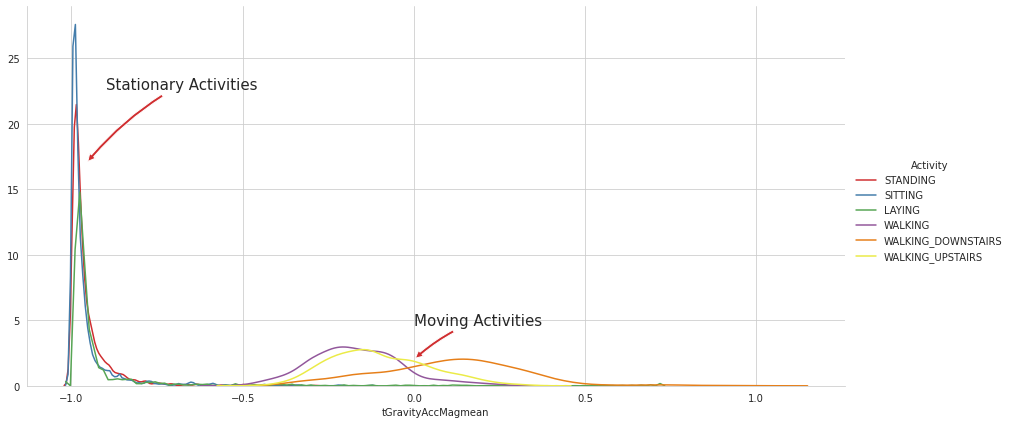

In [33]:
sns.set_palette("Set1", desat=0.8)
facetgrid = sns.FacetGrid(cpu_df,hue='Activity',size = 6, aspect=2)
facetgrid.map(sns.distplot,'tGravityAccMagmean',hist = False).add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=15,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.annotate("Moving Activities", xy = (0.0,2), xytext = (0.0,5),size = 15, va = 'center',ha='left', \
             arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))


### Obervations
1. All features values are in range (-1,1)
2. Distributions of static and moving activities are completly seperable
3. We need to check features if they can seperate stationary activities or not
3. We need to check features if they can seperate moving activities or not

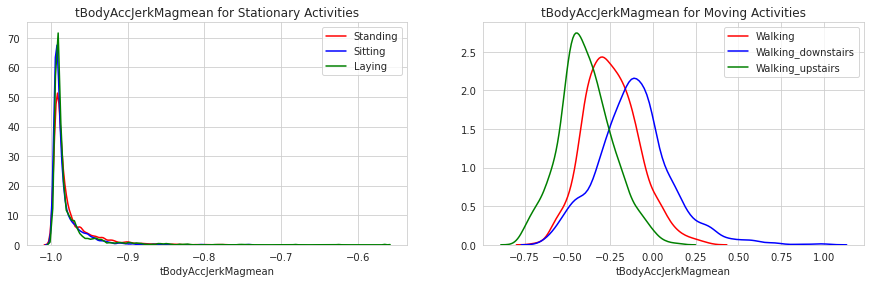

In [34]:
df1 = cpu_df[cpu_df['Activity'] == 'STANDING']
df2 = cpu_df[cpu_df['Activity'] == 'SITTING']
df3 = cpu_df[cpu_df['Activity'] == 'LAYING']
df4 = cpu_df[cpu_df['Activity'] == 'WALKING']
df5 = cpu_df[cpu_df['Activity'] == 'WALKING_DOWNSTAIRS']
df6 = cpu_df[cpu_df['Activity'] == 'WALKING_UPSTAIRS']

plt.figure(figsize=(15,9))
plt.subplot(2,2,1)
plt.title('tBodyAccJerkMagmean for Stationary Activities')
sns.distplot(df1['tBodyAccJerkMagmean'],color='r',hist=False,label="Standing")
sns.distplot(df2['tBodyAccJerkMagmean'],color='b',hist=False,label="Sitting")
sns.distplot(df3['tBodyAccJerkMagmean'],color='g',hist=False,label="Laying")

plt.subplot(2,2,2)
plt.title('tBodyAccJerkMagmean for Moving Activities')
sns.distplot(df4['tBodyAccJerkMagmean'],color='r',hist=False,label="Walking")
sns.distplot(df5['tBodyAccJerkMagmean'],color='b',hist=False,label="Walking_downstairs")
sns.distplot(df6['tBodyAccJerkMagmean'],color='g',hist=False,label="Walking_upstairs")

### Observations:
1. distributions of tBodyAccJerkMagmean for stationary activities are almost overlapping and concentrated around -1.00
2. distributions of tBodyAccJerkMagmean for moving activities are less overlapping and concentrated between -5.0 to 0.75
3. For moving activties tBodyAccJerkMagmean suggests moving activitties slightly seperable

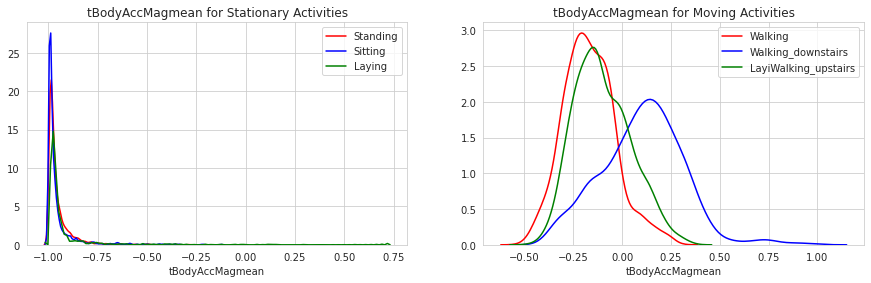

In [35]:
plt.figure(figsize=(15,9))
plt.subplot(2,2,1)
plt.title('tBodyAccMagmean for Stationary Activities')
sns.distplot(df1['tBodyAccMagmean'],color='r',hist=False,label="Standing")
sns.distplot(df2['tBodyAccMagmean'],color='b',hist=False,label="Sitting")
sns.distplot(df3['tBodyAccMagmean'],color='g',hist=False,label="Laying")

plt.subplot(2,2,2)
plt.title('tBodyAccMagmean for Moving Activities')
sns.distplot(df4['tBodyAccMagmean'],color='r',hist=False,label="Walking")
sns.distplot(df5['tBodyAccMagmean'],color='b',hist=False,label="Walking_downstairs")
sns.distplot(df6['tBodyAccMagmean'],color='g',hist=False,label="LayiWalking_upstairs")

### Observations:
1. distributions of tBodyAccMagmean for stationary activities are almost overlapping and concentrated around -1.00
2. distributions of tBodyAccMagmean for moving activities are less overlapping and concentrated between -5.0 to 0.75
3. For moving activties tBodyAccMagmean suggests WALKIN_downstairs can be seperable

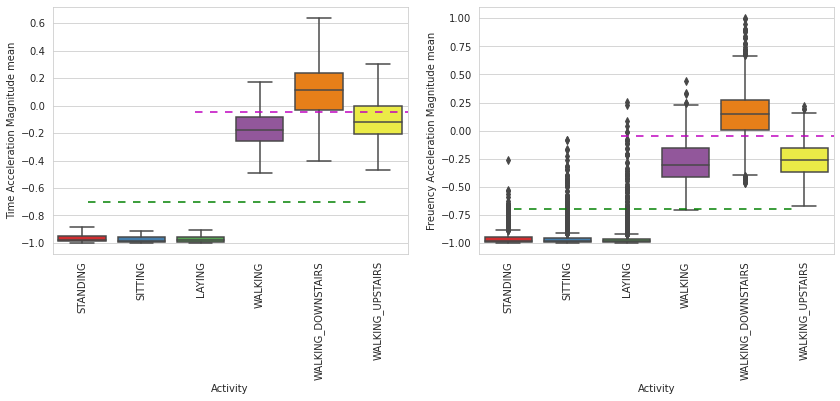

In [36]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.boxplot(x='Activity', y='tBodyAccMagmean',data=cpu_df, showfliers=False, saturation=1)
plt.ylabel('Time Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)

plt.subplot(2,2,2)
sns.boxplot(x='Activity', y='fBodyAccMagmean',data=cpu_df,showfliers=True,saturation=1)
plt.ylabel('Freuency Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

**Observations in time domain**
1. If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
2. If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
3. If tAccMean > 0.0 then the Activity is WalkingDownstairs.
4. We can classify 75% the Acitivity labels with some errors.

**Observations in Frequency domain**
1. If fBodyAccMagmean is < -0.75 then the Activities are either Standing or Sitting or Laying.
2. If fBodyAccMagmean is > -0.5 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
3. If fBodyAccMagmean > 0.0 then the Activity is WalkingDownstairs.
4. We can classify 75% the Acitivity labels with some errors.
<br> However here we can see the outliers

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

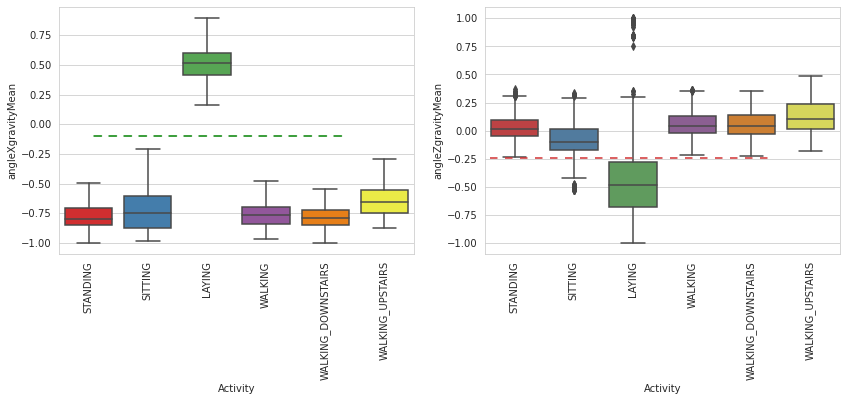

In [37]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.boxplot(x = 'Activity', y= 'angleXgravityMean',data = cpu_df,showfliers=False, saturation=1)
plt.axhline(y=-0.1, xmin = 0.1, xmax= 0.8, dashes=(5,5), c='g',animated = True,dash_capstyle = 'round')
plt.xticks(rotation = 90)

plt.subplot(2,2,2)
sns.boxplot(x='Activity', y= 'angleZgravityMean', data = cpu_df)
plt.axhline(y=-0.24, xmin=-1, xmax = 0.8, dashes = (5,5))
plt.xticks(rotation = 90)

### Observations:
1. angleXgravityMean feature value has competely different range for Laying activity compare to other activities hence this feature is important to classify Laying activity from others
3. Same can be concluded from angleZgravityMean observation however angleZgravityMean value for laying activity is lesser than other activities

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

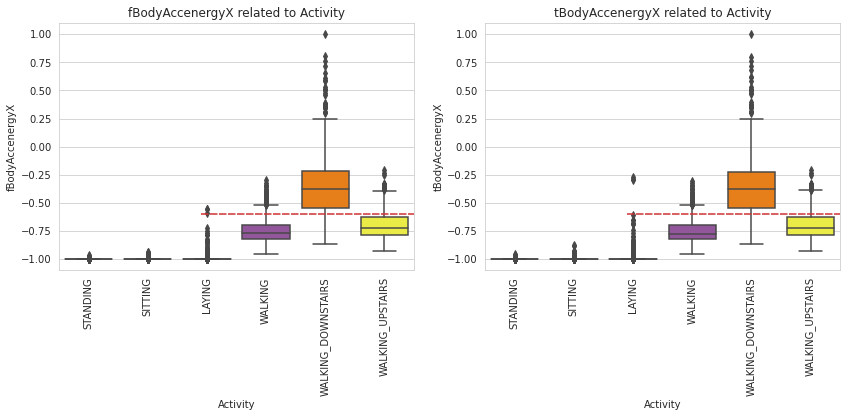

In [38]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.boxplot(x = 'Activity', y='fBodyAccenergyX', data=cpu_df, saturation = 1)
plt.axhline(y= -0.6, xmin = 0.4, xmax = 1.0, dashes = (5,1))
plt.title('fBodyAccenergyX related to Activity')
plt.xticks(rotation = 90)

plt.subplot(2,2,2)
sns.boxplot(x = 'Activity', y='tBodyAccenergyX', data=cpu_df, saturation = 1)
plt.axhline(y= -0.6, xmin = 0.4, xmax = 1.0, dashes = (5,1))
plt.title('tBodyAccenergyX related to Activity')
plt.xticks(rotation = 90)

### Observations:
1. By looking into individual features using Box plot we can conclude some features can differentiate the activity from others

#### Somehow all the features looks important here. If any specific feature may not clearly differntiate all activities other features may differentiate.
**TO get more clarifications perform dimensionality reduction**
1. Principal Component Analysis (PCA): https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues
2. t-SNE: https://distill.pub/2016/misread-tsne/

In [39]:
from cuml import PCA

In [40]:
X_gpuTemp = X_gpu.drop('subject',axis = 1) 
# WE are removing this columns as non numeric (categorical) data is not allowed in PCA

In [43]:
%%time
pca = PCA(n_components=2)
components = pca.fit_transform(X_gpuTemp)
components.shape

CPU times: user 103 ms, sys: 15.6 ms, total: 119 ms
Wall time: 126 ms


In [44]:
type(components)

cudf.core.dataframe.DataFrame

In [45]:
componentsDataFrame = components.to_pandas() # for visualization we need to transfer data again to CPU

In [46]:
componentsDataFrame.columns = ['component1', 'component2']

Text(0.5, 1.0, '2D Visualization of data using PCA')

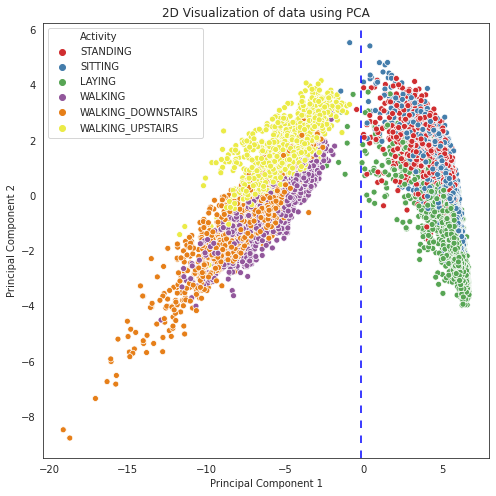

In [47]:
sns.set_style('white')
plt.figure(figsize=(8,8))
sns.scatterplot(x= 'component1', y = 'component2', hue=y_cpu, data=componentsDataFrame)
plt.axvline(x=-0.2, ymin = 0, ymax = 1, dashes = (5,5), c = 'b')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Visualization of data using PCA')

**Observations**
1. 2D visualization of data using PCA shows that there is significant difference between moving and stationary activities
2. PCA based visualization cannot differentiate stationary activities  
2. PCA based visualization cannot differentiate moving activities  

# tSNE

In [225]:
from cuml import TSNE
# from sklearn.manifold import TSNE

In [226]:
tsne = TSNE(n_components = 2)
tsneComponents = tsne.fit_transform(X_gpu)

In [227]:
tsneDataFrame = gdf.DataFrame(tsneComponents, columns = ['tsneComponent1','tsneComponent2'])

In [228]:
tsneDataFrameTemp = tsneDataFrame.to_pandas()
tsneDataFrameTemp.columns =  ['tsneComponent1','tsneComponent2']

Text(0.5, 1.0, '2D Visualization of data using tSNE with perplexity {i}')

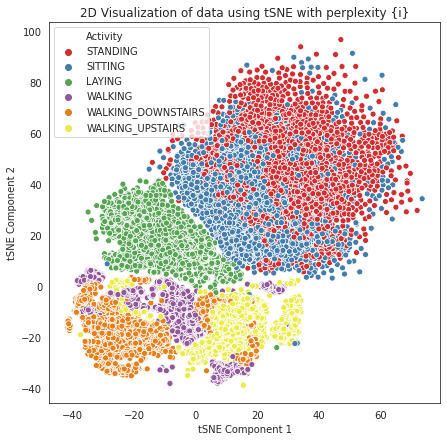

In [229]:
figure = plt.figure(figsize = (7,7))
sns.scatterplot(x= 'tsneComponent1', y = 'tsneComponent2', hue=y_cpu, data=tsneDataFrameTemp)
plt.xlabel('tSNE Component 1')
plt.ylabel('tSNE Component 2')
plt.title('2D Visualization of data using tSNE with perplexity {i}')

CPU times: user 7.11 s, sys: 6.05 s, total: 13.2 s
Wall time: 11.7 s


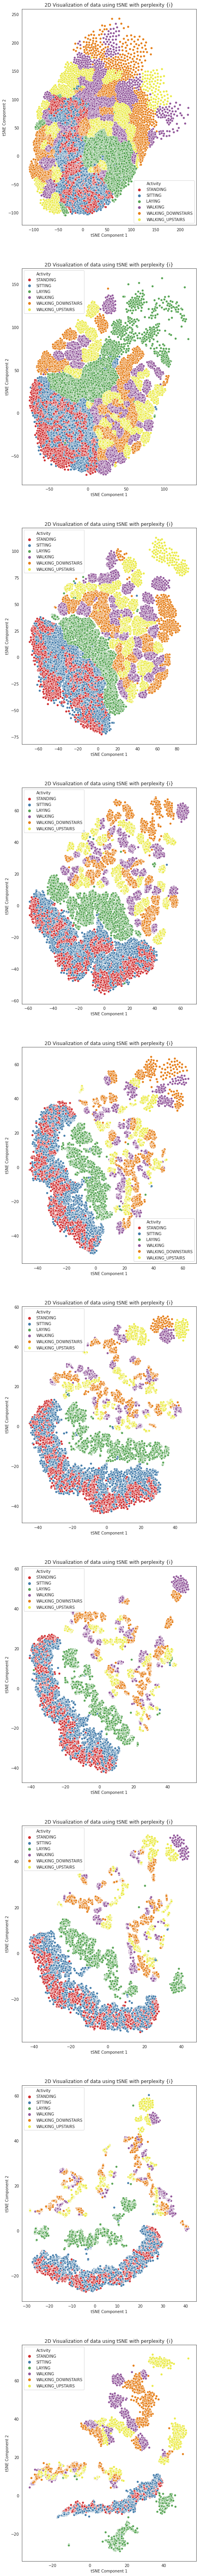

In [53]:
%%time
perplexities =[2,5,10,20,30,40,50,60,80,100]
sns.set_style('white')
plt.figure(figsize=(8,120))
for i, p in enumerate(perplexities):
  tsne = TSNE(n_components = 2, perplexity=p,verbose=1)
  tsneComponents = tsne.fit_transform(X_gpu)
  tsneDataFrame = gdf.DataFrame(tsneComponents, columns = ['tsneComponent1','tsneComponent2'])
  tsneDataFrameTemp = tsneDataFrame.to_pandas()
  tsneDataFrameTemp.columns = ['tsneComponent1','tsneComponent2']
  plt.subplot(10,1,i+1)
  sns.scatterplot(x= 'tsneComponent1', y = 'tsneComponent2', hue=y_cpu, data=tsneDataFrameTemp)
  plt.xlabel('tSNE Component 1')
  plt.ylabel('tSNE Component 2')
  plt.title('2D Visualization of data using tSNE with perplexity {i}')

**Observations:**
1. PCA cannot differentiate static activities standing, sitting and laying but using tSNE we can see the difference.  
2. PCA cannot differentiate moving activities standing, sitting and laying but using tSNE we can see the difference.
3. However tSNE shows slight confusion between two activities sitting and standing
4. Finally good new is all classes are seperable :-) 

## **Machine Learning Model Training**
#### **Performance Measures**
  - As this is a classification problem and dataset is almost balanced Accuracy as perrformance metric can be used
  - For the sake of detailed classification report we will use Confusion Matrix and Precision Matrix

In [54]:
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report
# from sklearn.metrics import accuracy_score
from cuml.metrics.accuracy import accuracy_score

### Why label encoding?
 - Labels are in string format to convert them into numbers we use label encoding
 - Label encoder assigns unique numerical value to the categorical string feature value

In [55]:
from cuml.preprocessing import LabelEncoder

In [56]:
y = gpu_df['Activity']
X = gpu_df.drop(['Activity','subject'],axis = 1)

In [57]:
le = LabelEncoder()
le.fit(y)  # le = le.fit(data.category) also works
encodedLabels = le.transform(y)

In [58]:
#y = y.map({'STANDING': 0, 'SITTING': 1, 'LAYING': 2, 'WALKING':3,'WALKING_DOWNSTAIRS':4, 'WALKING_UPSTAIRS':5})

In [59]:
encodedLabels.head()

0    2
1    2
2    2
3    2
4    2
dtype: int8

In [60]:
str_label = le.inverse_transform(encodedLabels)

In [61]:
str_label.head()

0    STANDING
1    STANDING
2    STANDING
3    STANDING
4    STANDING
dtype: object

In [62]:
print(list(le.classes_))

['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']


In [63]:
import cudf
print(list(le.inverse_transform(cudf.Series([0,1,2,3,4,5]))))

['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']


In [64]:
print("shape of encodedLabels: ",encodedLabels.shape)
print("shape of X: ",X.shape)

shape of encodedLabels:  (10299,)
shape of X:  (10299, 561)


In [65]:
encodedLabels = encodedLabels.astype('float64')

## Split data into Train, Test, Cross Validation

In [66]:
#from sklearn.model_selection import train_test_split
from cuml.preprocessing.model_selection import train_test_split

In [67]:
X_gpu = X_gpu.drop('subject',axis = 1) 

In [68]:
X1,X_test,y1,y_test = train_test_split(X_gpu,encodedLabels,test_size = 0.2,random_state = 10)
X_train, X_cv, y_train, y_cv = train_test_split(X1,y1,test_size = 0.2, random_state = 10)

In [69]:
print("Number of data points in Train", X_train.shape)
print("Number of data points in Test", X_test.shape)
print("Number of data points in CV", X_cv.shape)

Number of data points in Train (6592, 561)
Number of data points in Test (2059, 561)
Number of data points in CV (1648, 561)


In [70]:
print("Number of data points in Train", y_train.shape)
print("Number of data points in Test", y_test.shape)
print("Number of data points in CV", y_cv.shape)

Number of data points in Train (6592,)
Number of data points in Test (2059,)
Number of data points in CV (1648,)


## Machine Learning Models using cuml
1. Random Model - Benchmark
2. Logistic Regression
3. K-Nearest Neighbour
4. SVM Classifier # binary classification is supported NOT Multiclass
5. Decision Tree #Not supported yet in RAPIDS
6. Random Forest
7. XGBoost
8. SGD Classifier
9. MiniBatch SGD Classifier
10. Forest Inference Library
<br> ***Note:*** Here we are trying alll Models just for demonstration purpose. In real applications choice of these models entirely depends on application domain, data size, data type, time space complexity etc.

### Performance Metrics
1. Confusion Matrix
2. Precision Matrix
3. Recall Matrix
4. Classification Report - F-1 Score
5. Accuracy
<br> ***Note:*** As of now all performance metrics are not supported in RAPIDS - Only accuracy metric s supported

In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [72]:
#This function prints Confusion Matrix, Precision and Reccall Matrix
def printPerformace(actual, prediction, string):
  cf = confusion_matrix(actual,prediction)
  plt.figure(figsize=(14,9))
  plt.subplot(2,2,1)
  sns.heatmap(cf,fmt= ".2g", annot=True,xticklabels = True, yticklabels = True)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title("Confusion Matrix for " + string)
  
  plt.subplot(2,2,2)
  colSum = np.sum(cf, axis = 0)
  colSum = colSum.reshape(-1,1)
  PrecisionMatrix = cf/colSum
  sns.heatmap(PrecisionMatrix,fmt= ".2g", annot=True,xticklabels = True, yticklabels = True)  
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title("Precision Matrix for " + string)

  plt.subplot(2,2,3)
  rowSum = np.sum(cf, axis = 1)
  rowSum = rowSum.reshape(1,-1)
  RecallMatrix = cf/rowSum
  sns.heatmap(RecallMatrix,fmt= ".3g", annot=True,xticklabels = True, yticklabels = True)  
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title("Recall Matrix for " + string)


### 1. Random Model - Benchmark
- Here we first check the random model performance. We pick integer random numbers in the range 0 to 5 (inclusive) as we have 6 classes. 
- We consider this array as predictions from Random Model and check the performance by comparing with actual labels

In [73]:
import cupy as cp # Here we use cupy as replacement to numpy
import numpy as np
# !pip install cupy-cuda102

In [74]:
# Generate random numbers in the eange 0 to 5
cp.random.seed(10)
y_pred = cp.random.randint(low=0, high=6, size=(X_test.shape[0],)) # Data points to be matched with number of datapoints in test set
cp.unique(y_pred)

array([0, 1, 2, 3, 4, 5])

In [75]:
def bringToCPU(y_pred):
    y_predC = cp.asnumpy(y_pred)
    print("predicted values brought to CPU !")
    print(f"Type of y_predC{type(y_predC)}")
    return y_predC

In [76]:
# Test set labels brought to CPU 
y_testC = y_test.to_pandas()
# CV set labels brought to CPU 
y_cvC = y_cv.to_pandas()

In [77]:
y_predC = bringToCPU(y_pred)

predicted values brought to CPU !
Type of y_predC<class 'numpy.ndarray'>


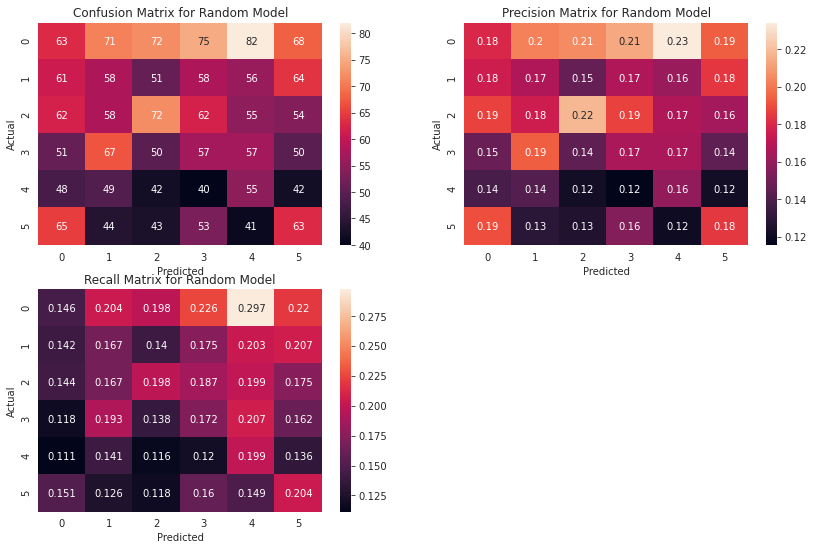

In [78]:
printPerformace(y_testC, y_predC, "Random Model")
#['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']
#[  0           1           2          3                4                  5          ]

In [79]:
print("Classification report of Random Model")
print(classification_report(y_testC, y_predC))
print("Accuracy of Random Model: ", accuracy_score(y_testC, y_predC))

Classification report of Random Model
              precision    recall  f1-score   support

         0.0       0.18      0.15      0.16       431
         1.0       0.17      0.17      0.17       348
         2.0       0.22      0.20      0.21       363
         3.0       0.17      0.17      0.17       332
         4.0       0.16      0.20      0.18       276
         5.0       0.18      0.20      0.19       309

    accuracy                           0.18      2059
   macro avg       0.18      0.18      0.18      2059
weighted avg       0.18      0.18      0.18      2059

Accuracy of Random Model:  0.1787275376396309


## 2. Logistic Regression

In [80]:
from cuml.linear_model import LogisticRegression
from tqdm import tqdm

In [81]:
%%time
lamda = [10**x for x in range(-4,4,1)]
accuracies = []

for l in tqdm(lamda):
  clfLR = LogisticRegression(penalty = 'l2', C = l)
  clfLR.fit(X_train,y_train)
  y_predLR = clfLR.predict(X_cv)
  y_predLRC = y_predLR.to_pandas() # we convert to pandas as we are using accuracy_score() from sklearn
  accuracies.append(accuracy_score(y_cvC, y_predLRC))

100%|██████████| 8/8 [00:01<00:00,  4.18it/s]

CPU times: user 1.69 s, sys: 199 ms, total: 1.89 s
Wall time: 1.92 s


In [82]:
accuracies

[0.1796116504854369,
 0.1796116504854369,
 0.2433252427184466,
 0.5570388349514563,
 0.8586165048543689,
 0.908373786407767,
 0.9569174757281553,
 0.9757281553398058]

In [83]:
bestLamda = lamda[accuracies.index(max(accuracies))]
clfLR = LogisticRegression(penalty = 'l2', C = bestLamda, max_iter = 1000)
clfLR.fit(X_train,y_train)
y_predLR = clfLR.predict(X_test)
y_predLRC = y_predLR.to_pandas()
print("Final Accuracy: ", accuracy_score(y_testC,y_predLRC))

Final Accuracy:  0.9771733851384167


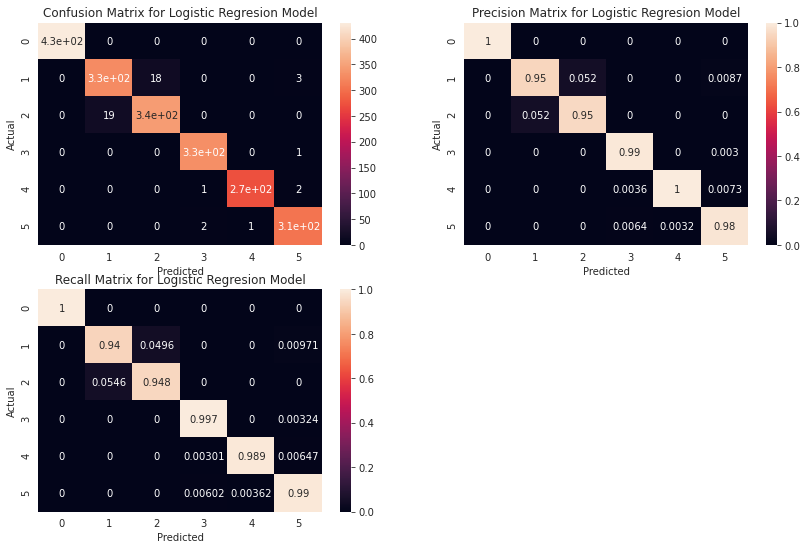

In [84]:
printPerformace(y_testC, y_predLRC, "Logistic Regresion Model")
#['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']
#[  0           1           2          3                4                  5          ]

In [85]:
print("Classification report of Logistic Regression Model")
print(classification_report(y_testC, y_predLRC))
print("Accuracy of Logistic Regression Model: ", accuracy_score(y_testC, y_predLRC))

Classification report of Logistic Regression Model
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       431
         1.0       0.95      0.94      0.94       348
         2.0       0.95      0.95      0.95       363
         3.0       0.99      1.00      0.99       332
         4.0       1.00      0.99      0.99       276
         5.0       0.98      0.99      0.99       309

    accuracy                           0.98      2059
   macro avg       0.98      0.98      0.98      2059
weighted avg       0.98      0.98      0.98      2059

Accuracy of Logistic Regression Model:  0.9771733851384167


## 3. K - Nearest Neighbour

In [86]:
from cuml.neighbors import KNeighborsClassifier

In [87]:
%%time
neighbor = [3,7,11,15,19,21,27,31,37,41]
accuracies = []

for k in tqdm(neighbor):
  clfKNN = KNeighborsClassifier(n_neighbors = k)
  clfKNN.fit(X_train,y_train)
  y_predKNN = clfKNN.predict(X_cv)
  y_predKNNC = y_predKNN.to_pandas() # we convert to pandas as we are using accuracy_score() from sklearn
  accuracies.append(accuracy_score(y_cvC, y_predKNNC))

100%|██████████| 10/10 [00:02<00:00,  3.68it/s]

CPU times: user 1.79 s, sys: 933 ms, total: 2.72 s
Wall time: 2.72 s


In [88]:
accuracies

[0.9678398058252428,
 0.9648058252427184,
 0.9611650485436893,
 0.9538834951456311,
 0.9502427184466019,
 0.9478155339805825,
 0.9453883495145631,
 0.941747572815534,
 0.9344660194174758,
 0.933252427184466]

In [89]:
bestK = neighbor[accuracies.index(max(accuracies))]
bestK

3

In [90]:
clfKNN = KNeighborsClassifier(n_neighbors = bestK)
clfKNN.fit(X_train,y_train)
y_predKNN = clfKNN.predict(X_test)
y_predKNNC = y_predKNN.to_pandas() # we convert to pandas as we are using accuracy_score() from sklearn
print("Final Accuracy: ", accuracy_score(y_testC,y_predKNNC))

Final Accuracy:  0.9645458960660515


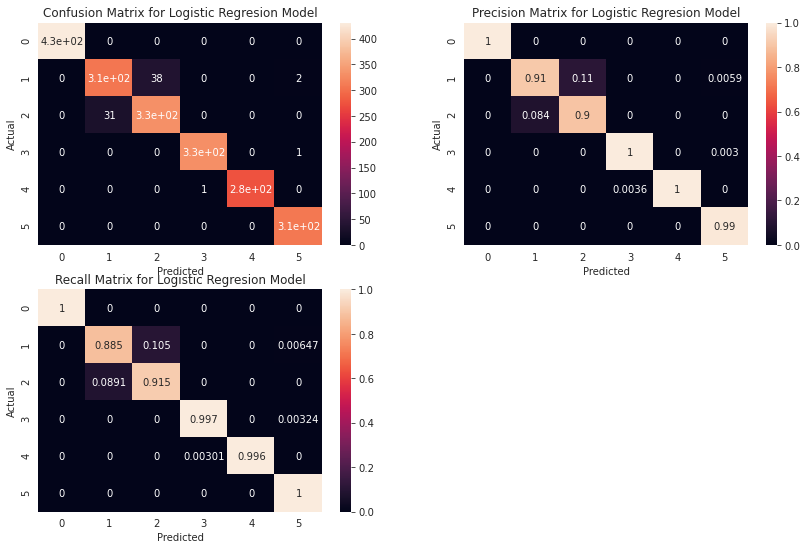

In [91]:
printPerformace(y_testC, y_predKNNC, "Logistic Regresion Model")
#['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']
#[  0           1           2          3                4                  5          ]

In [92]:
print("Classification report of KNN")
print(classification_report(y_testC, y_predKNNC))
print("Accuracy of KNN Model: ", accuracy_score(y_testC, y_predKNNC))

Classification report of KNN
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       431
         1.0       0.91      0.89      0.90       348
         2.0       0.90      0.91      0.91       363
         3.0       1.00      1.00      1.00       332
         4.0       1.00      1.00      1.00       276
         5.0       0.99      1.00      1.00       309

    accuracy                           0.96      2059
   macro avg       0.97      0.97      0.97      2059
weighted avg       0.96      0.96      0.96      2059

Accuracy of KNN Model:  0.9645458960660515


## 4. SVM Classifier

#### ***As of now multiclass classification is not supported for SVM in RAPDIDS So we will try for ***one-vs-rest*** classification technique ***


In [98]:
from cuml.svm import SVC

In [99]:
y_01 = y1.applymap(lambda x:  1 if x == 0 else 0)
y_11 = y1.applymap(lambda x:  1 if x == 1 else 0)
y_21 = y1.applymap(lambda x:  1 if x == 2 else 0)
y_31 = y1.applymap(lambda x:  1 if x == 3 else 0)
y_41 = y1.applymap(lambda x:  1 if x == 4 else 0)
y_51 = y1.applymap(lambda x:  1 if x == 5 else 0)

In [100]:
y_0test = y_test.applymap(lambda x:  1 if x == 0 else 0)
y_1test = y_test.applymap(lambda x:  1 if x == 1 else 0)
y_2test = y_test.applymap(lambda x:  1 if x == 2 else 0)
y_3test = y_test.applymap(lambda x:  1 if x == 3 else 0)
y_4test = y_test.applymap(lambda x:  1 if x == 4 else 0)
y_5test = y_test.applymap(lambda x:  1 if x == 5 else 0)

In [101]:
clf_0 = SVC(kernel = 'rbf',gamma = 0.1)
clf_1 = SVC(kernel = 'rbf',gamma = 0.1)
clf_2 = SVC(kernel = 'rbf',gamma = 0.1)
clf_3 = SVC(kernel = 'rbf',gamma = 0.1)
clf_4 = SVC(kernel = 'rbf',gamma = 0.1)
clf_5 = SVC(kernel = 'rbf',gamma = 0.1)

In [102]:
clf_0.fit(X1,y_01)
clf_1.fit(X1,y_11)
clf_2.fit(X1,y_21)
clf_3.fit(X1,y_31)
clf_4.fit(X1,y_41)
clf_5.fit(X1,y_51)

SVC(handle=<cuml.common.handle.Handle object at 0x7f62a0cfab90>, C=1, kernel='rbf', degree=3, gamma=0.1, coef0=0.0, tol=0.001, cache_size=200.0, max_iter=-1, nochange_steps=1000, verbose=2)

In [103]:
y_predSVM_0 = clf_0.predict(X_test)
y_predSVM_1 = clf_1.predict(X_test)
y_predSVM_2 = clf_2.predict(X_test)
y_predSVM_3 = clf_3.predict(X_test)
y_predSVM_4 = clf_4.predict(X_test)
y_predSVM_5 = clf_5.predict(X_test)

In [104]:
y0_pandas = y_predSVM_0.to_pandas()
y1_pandas = y_predSVM_1.to_pandas()
y2_pandas = y_predSVM_2.to_pandas()
y3_pandas = y_predSVM_3.to_pandas()
y4_pandas = y_predSVM_4.to_pandas()
y5_pandas = y_predSVM_5.to_pandas()

In [105]:
y0_pandas.shape[0]

2059

In [106]:
y_pred = gdf.Series([x*0 for x in range(y0_pandas.shape[0])])

In [107]:
for i in range(y0_pandas.shape[0]):
    if y0_pandas.iloc[i] == 1:
        y_pred.iloc[i] = 0
        continue
    elif y1_pandas.iloc[i] == 1:
        y_pred.iloc[i] = 1
        continue
    elif y2_pandas.iloc[i] == 1:
        y_pred.iloc[i] = 2
        continue
    elif y3_pandas.iloc[i] == 1:
        y_pred.iloc[i] = 3
        continue
    elif y4_pandas.iloc[i] == 1:
        y_pred.iloc[i] = 4
        continue
    elif y5_pandas.iloc[i] == 1:
        y_pred.iloc[i] = 5
        continue       

In [108]:
y_predSVMC = y_pred.to_pandas()

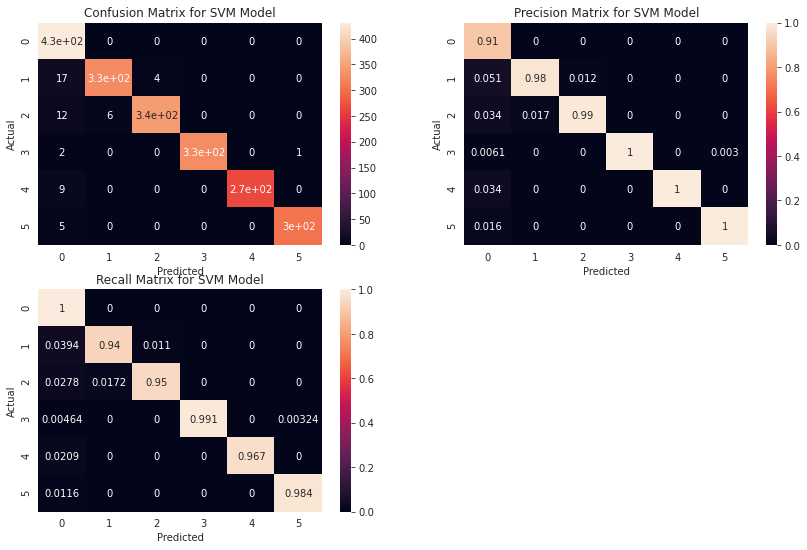

In [109]:

printPerformace(y_testC, y_predSVMC, "SVM Model")
#['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']
#[  0           1           2          3                4                  5          ]

In [255]:
print("Classification report of SVM")
print(classification_report(y_testC, y_predSVMC))
print("Accuracy of SVM Model: ", accuracy_score(y_testC, y_predSVMC))

Classification report of SVM
              precision    recall  f1-score   support

           0       0.47      0.50      0.48       407
           1       0.48      0.48      0.48       338
           2       0.45      0.46      0.46       378
           3       0.49      0.51      0.50       357
           4       0.45      0.41      0.43       280
           5       0.50      0.48      0.49       299

    accuracy                           0.47      2059
   macro avg       0.47      0.47      0.47      2059
weighted avg       0.47      0.47      0.47      2059

Accuracy of SVM Model:  0.47498785818358424


### ***Note: *** Here we are getting less accuracy because to implement one-vs-rest we need probability based outcome but here in RAPIDS predict_prob is option yet to be developed

## 5. Random Forest

***Known Limitations:*** This is an early release of the cuML Random Forest code. It contains a few known limitations:
1. GPU-based inference is only supported if the model was trained with 32-bit (float32) datatypes. CPU-based inference may be used in this case as a slower fallback.
2. Very deep / very wide models may exhaust available GPU memory. Future versions of cuML will provide an alternative algorithm to reduce memory consumption.
3. ‘GPU’ to predict using the GPU, ‘CPU’ otherwise. The ‘GPU’ can only be used if the model was trained on float32 data and X is float32 or convert_dtype is set to True. Also the ‘GPU’ should only be used for binary classification problems.

In [93]:
from cuml.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

In [113]:
# We need to train model on 32-bit data lets convert into 32 bit
y1_32bit = y1.astype('int32')
X1_32bit = X1.astype('float32')

y_test32bit = y_test.astype('int32')
X_test32bit = X_test.astype('float32')

In [114]:
from cuml.metrics.accuracy import accuracy_score as cuaccuracy_score
from statistics import mean
from tqdm import tqdm

In [115]:
finalAccuracies = []

In [117]:
%%time
for estim in tqdm(range(100,500,50)):
    for maxDepth in tqdm(range(10,20,1)):
        skf = KFold(n_splits=5, shuffle=True, random_state=42)
        accuracies = []
        for i,(idxT, idxV) in enumerate(skf.split(X1_32bit.iloc[:,:],y1_32bit)):
            model= RandomForestClassifier(n_estimators=estim, max_depth = maxDepth)
            model.fit(X1_32bit.iloc[idxT,:], y1_32bit.iloc[idxT])
            y_predRF = model.predict(X1_32bit.iloc[idxV,:])
            acc = cuaccuracy_score(y_predRF,y1_32bit.iloc[idxV])
            accuracies.append(acc)
        finalAccuracies.append(mean(accuracies))

  0%|          | 0/10 [00:00<?, ?it/s]/opt/conda/envs/rapids/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Switching over to use the CPU predict since the GPU predict currently cannot perform multi-class classification.
  

100%|██████████| 8/8 [1:43:59<00:00, 779.97s/it]

CPU times: user 2h 5min 53s, sys: 2min 57s, total: 2h 8min 50s
Wall time: 1h 43min 59s


In [107]:
for i, acc in enumerate(finalAccuracies):
    print(i, acc)

0 0.956067967414856
1 0.9614077687263489
2 0.9654126286506652
3 0.9682038784027099
4 0.9692961215972901
5 0.970509696006775
6 0.9707524299621582
7 0.9706310629844666
8 0.9707524299621582
9 0.9709951400756835
10 0.9565534114837646
11 0.9625
12 0.9663835048675538
13 0.9684465885162353
14 0.9699029088020324
15 0.9711164951324462
16 0.9709951400756835
17 0.971601951122284
18 0.9711165070533753
19 0.9722087383270264
20 0.9571601986885071
21 0.9633494973182678
22 0.9669902801513672
23 0.9684466123580933
24 0.9700242757797242
25 0.9707524299621582
26 0.9707524418830872
27 0.9708737730979919
28 0.9711165189743042
29 0.9711165070533753
30 0.9570388317108154
31 0.9632281541824341
32 0.9667475819587708
33 0.9686893105506897
34 0.9701456427574158
35 0.9707524299621582
36 0.9708737850189209
37 0.9717232942581177
38 0.9717232942581177
39 0.9713592052459716
40 0.9576456308364868
41 0.9627427101135254
42 0.9663835048675538
43 0.9684466123580933
44 0.9696601986885071
45 0.9703883409500123
46 0.97099515

In [108]:
depth = 14
estimators = 350

In [109]:
%%time
model= RandomForestClassifier(n_estimators=estimators, max_depth = depth)
model.fit(X1_32bit, y1_32bit)

RandomForestClassifier(n_estimators=350, max_depth=14, handle=<cuml.common.handle.Handle object at 0x7f26ce213850>, max_features='auto', n_bins=8, n_streams=8, split_algo=1, split_criterion=0, min_rows_per_node=2, bootstrap=True, bootstrap_features=False, verbose=2, rows_sample=1.0, max_leaves=-1, quantile_per_tree=False, output_type='cudf', dtype=float32, min_impurity_decrease=0.0, seed=None)

In [110]:
y_predRF = model.predict(X_test32bit)

/opt/conda/envs/rapids/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Switching over to use the CPU predict since the GPU predict currently cannot perform multi-class classification.
  """Entry point for launching an IPython kernel.


In [111]:
X_test32bit.shape

(2059, 561)

In [112]:
y_predRF.shape

(2059,)

In [113]:
y_predRFC = y_predRF.to_pandas()

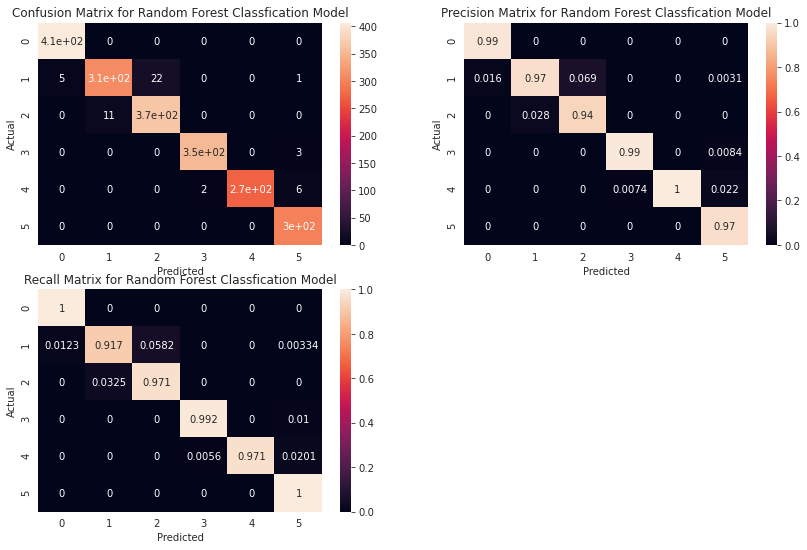

In [114]:
printPerformace(y_testC, y_predRFC, "Random Forest Classfication Model")
#['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']
#[  0           1           2          3                4                  5          ]

In [115]:
print("Classification report of  of Random Forest")
print(classification_report(y_testC, y_predRFC))
print("Accuracy of Random Forest Model: ", accuracy_score(y_testC, y_predRFC))

Classification report of  of Random Forest
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       407
         1.0       0.97      0.92      0.94       338
         2.0       0.94      0.97      0.96       378
         3.0       0.99      0.99      0.99       357
         4.0       1.00      0.97      0.99       280
         5.0       0.97      1.00      0.98       299

    accuracy                           0.98      2059
   macro avg       0.98      0.98      0.98      2059
weighted avg       0.98      0.98      0.98      2059

Accuracy of Random Forest Model:  0.9757163671685284


## 6. XGBoost classifier

In [110]:
import xgboost as xgb

In [111]:
## Create train and test dmatrix
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix( X_test, y_test)
dcv = xgb.DMatrix(X_cv,y_cv)

In [112]:
%%time
trained_model = xgb.train(
                        {
                          'learning_rate': 0.1,
                          'colsample_bytree' : 0.3,
                          'max_depth': 5,
                          'objective': 'multi:softmax',
                          'num_class': 6,
                          'n_estimators':300,
                          'alpha' : 10,
                          'silent': True,
                          'verbose_eval': False,
                          'tree_method':'gpu_hist',
                        },
                        dtrain,
                        num_boost_round=100, evals=[(dtrain, 'train')])

[0]	train-merror:0.06417
[1]	train-merror:0.05264
[2]	train-merror:0.04779
[3]	train-merror:0.04475
[4]	train-merror:0.04521
[5]	train-merror:0.04399
[6]	train-merror:0.04339
[7]	train-merror:0.04096
[8]	train-merror:0.03990
[9]	train-merror:0.03929
[10]	train-merror:0.03823
[11]	train-merror:0.03686
[12]	train-merror:0.03444
[13]	train-merror:0.03322
[14]	train-merror:0.03292
[15]	train-merror:0.03201
[16]	train-merror:0.03110
[17]	train-merror:0.03019
[18]	train-merror:0.02913
[19]	train-merror:0.02806
[20]	train-merror:0.02715
[21]	train-merror:0.02609
[22]	train-merror:0.02564
[23]	train-merror:0.02412
[24]	train-merror:0.02336
[25]	train-merror:0.02276
[26]	train-merror:0.02124
[27]	train-merror:0.01972
[28]	train-merror:0.01942
[29]	train-merror:0.01896
[30]	train-merror:0.01866
[31]	train-merror:0.01851
[32]	train-merror:0.01760
[33]	train-merror:0.01714
[34]	train-merror:0.01638
[35]	train-merror:0.01608
[36]	train-merror:0.01562
[37]	train-merror:0.01547
[38]	train-merror:0.01

In [147]:
prediction = trained_model.predict(dtest)

In [148]:
y_predXGC = bringToCPU(prediction)

predicted values brought to CPU !
Type of y_predC<class 'numpy.ndarray'>


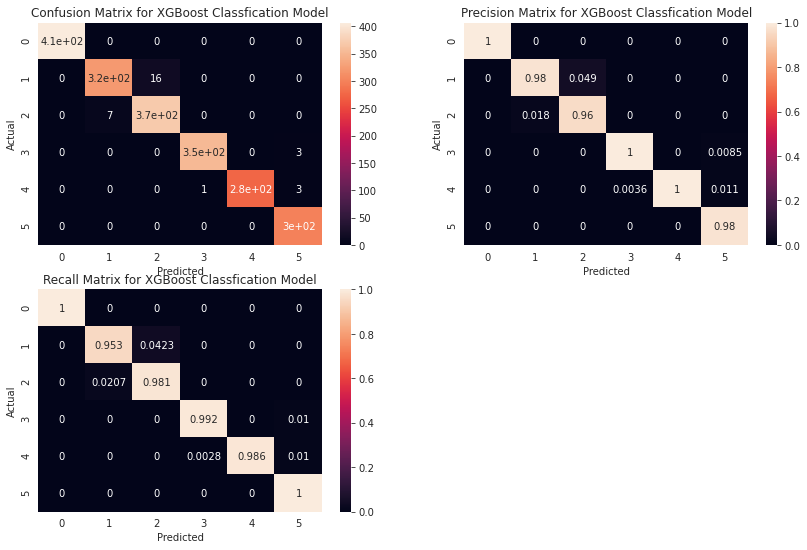

In [149]:
printPerformace(y_testC, y_predXGC, "XGBoost Classfication Model")
#['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']
#[  0           1           2          3                4                  5          ]

In [150]:
print("Classification report of  of XGBoost")
print(classification_report(y_testC, y_predXGC))
print("Accuracy of Random Forest Model: ", accuracy_score(y_testC, y_predXGC))

Classification report of  of XGBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       407
           1       0.98      0.95      0.97       338
           2       0.96      0.98      0.97       378
           3       1.00      0.99      0.99       357
           4       1.00      0.99      0.99       280
           5       0.98      1.00      0.99       299

    accuracy                           0.99      2059
   macro avg       0.99      0.99      0.99      2059
weighted avg       0.99      0.99      0.99      2059

Accuracy of Random Forest Model:  0.985429820301117


#### **Final Accuracies**

                                *** SK-Learn ***                *** cuML ***

        Model              Accuracy         Precision      Accuracy        Precision
    Random Model             15.2             15              17                17
    KNN                      96.3             97             96.66              97
    Logistic Regression      97.81            98             97.81              98
    SVM Classifier           99.2233          99             47.49              47
    Decision Tree            94.3689          94               NA               NA
    Random Forest            97.8155          98              97.51             98
    XGBOOST                  98.20            99              98.54             99



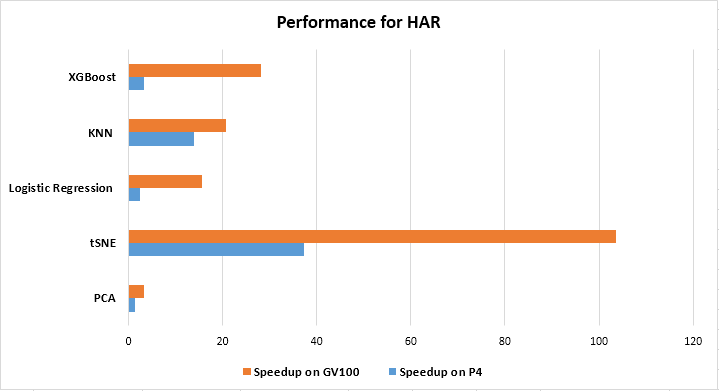

# Unsupervised Machine Learning

In [118]:
X_gpu.shape

(10299, 561)

In [119]:
X_gpu.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagmeanFreq', 'fBodyBodyGyroJerkMagskewness',
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean'],
      dtype='object', length=561)

## K-means clustering

1. Here we will consider only features of the data set and check with two clusters
2. cluster 0 contains all stationary activities
3. cluster 1 contains all moving activities

In [120]:
from cuml import KMeans
from cuml.cluster import KMeans

In [163]:
%%time
kmeans_float = KMeans(n_clusters=2)
kmeans_float.fit(X_gpu)

CPU times: user 51.4 ms, sys: 0 ns, total: 51.4 ms
Wall time: 49.6 ms


In [152]:
print("labels:")
print(kmeans_float.labels_)
print("cluster_centers:")
print(kmeans_float.cluster_centers_)

labels:
0        0
1        0
2        0
3        0
4        0
        ..
10294    1
10295    1
10296    1
10297    1
10298    1
Length: 10299, dtype: int32
cluster_centers:
        0         1         2         3         4         5         6    \
0  0.275169 -0.015506 -0.106943 -0.977255 -0.939302 -0.944683 -0.979563   
1  0.273363 -0.020422 -0.111298 -0.165396  0.003606 -0.216000 -0.219343   

        7         8         9    ...       551       552       553       554  \
0 -0.940012 -0.943083 -0.919925  ...  0.143219 -0.357060 -0.666912  0.009679   
1 -0.029614 -0.222144  0.075900  ...  0.106938 -0.228585 -0.558776  0.005342   

        555       556       557       558       559       560  
0  0.009327  0.014114 -0.002339 -0.306737 -0.077055 -0.164775  
1 -0.005350  0.021957 -0.017457 -0.723763  0.231256  0.078012  

[2 rows x 561 columns]


In [153]:
kmeansLabels = kmeans_float.labels_

In [127]:
type(y_gpu)

cudf.core.series.Series

In [154]:
y_gpu

0                STANDING
1                STANDING
2                STANDING
3                STANDING
4                STANDING
               ...       
10294    WALKING_UPSTAIRS
10295    WALKING_UPSTAIRS
10296    WALKING_UPSTAIRS
10297    WALKING_UPSTAIRS
10298    WALKING_UPSTAIRS
Name: Activity, Length: 10299, dtype: object

In [155]:
cpuLabels = y_cpu.map(lambda x: 1 if x == 'STANDING' or x == 'LAYING' or x == 'SITTING' else 0)

In [156]:
y_cpu[cpuLabels == 1]

0        STANDING
1        STANDING
2        STANDING
3        STANDING
4        STANDING
           ...   
10206      LAYING
10207      LAYING
10208      LAYING
10209      LAYING
10210      LAYING
Name: Activity, Length: 5627, dtype: object

In [157]:
cpuKmeansLabels = kmeansLabels.to_pandas()

In [165]:
print("Cluster 0 with all stationary activities")
y_cpu[cpuKmeansLabels == 0].value_counts()

Cluster 0 with all stationary activities


LAYING      1932
STANDING    1906
SITTING     1774
Name: Activity, dtype: int64

In [166]:
print("Cluster 1 with all Moving activities")
y_cpu[cpuKmeansLabels == 1].value_counts()

Cluster 1 with all Moving activities


WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
LAYING                  12
SITTING                  3
Name: Activity, dtype: int64

### Observation:
1. Cluster 0 contains all data points with stationary activities
2. cluster 1 contains most of the moving activities but 13 LAYING and 3 SITTING activites also  belongs to cluster 1 - MISCLASSIFICATION
3. *** 13 points misclassified ***

In [160]:
y_cpu.value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

#### Lets check with creating 6 clusters using Kmeans

In [168]:
%%time
kmeans_float = KMeans(n_clusters=6)
kmeans_float.fit(X_gpu)

CPU times: user 64.3 ms, sys: 16 ms, total: 80.3 ms
Wall time: 78.2 ms


In [ ]:
print("labels:")
print(kmeans_float.labels_)
print("cluster_centers:")
print(kmeans_float.cluster_centers_)

In [170]:
kmeansLabels = kmeans_float.labels_

In [ ]:
#['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']
#[  0           1           2          3                4                  5          ]

In [173]:
cpuKmeansLabels = kmeansLabels.to_pandas()

In [187]:
y_cpu

0                STANDING
1                STANDING
2                STANDING
3                STANDING
4                STANDING
               ...       
10294    WALKING_UPSTAIRS
10295    WALKING_UPSTAIRS
10296    WALKING_UPSTAIRS
10297    WALKING_UPSTAIRS
10298    WALKING_UPSTAIRS
Name: Activity, Length: 10299, dtype: object

In [174]:
cpuKmeansLabels.value_counts()

4    2485
5    2076
1    1925
0    1810
2    1317
3     686
dtype: int64

In [188]:
cpuKmeansLabels[y_cpu == "LAYING"].value_counts() # LAYING

0    1761
2     171
5      12
dtype: int64

In [189]:
cpuKmeansLabels[y_cpu == "STANDING"].value_counts() # LAYING

4    1232
2     674
dtype: int64

In [190]:
cpuKmeansLabels[y_cpu == "SITTING"].value_counts() # LAYING

4    1253
2     472
0      49
5       3
dtype: int64

In [191]:
cpuKmeansLabels[y_cpu == "WALKING"].value_counts() # LAYING

1    865
5    707
3    150
dtype: int64

In [192]:
cpuKmeansLabels[y_cpu == "WALKING_UPSTAIRS"].value_counts() # LAYING

5    1167
1     296
3      81
dtype: int64

In [193]:
cpuKmeansLabels[y_cpu == "WALKING_DOWNSTAIRS"].value_counts() # LAYING

1    764
3    455
5    187
dtype: int64

In [172]:
y_cpu.value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64